<a href="https://colab.research.google.com/github/FireDragon00/TAG_model/blob/main/%E8%AE%BA%E6%96%87%E5%AE%9E%E9%AA%8C_SAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
!pip install pandas
!pip install torch
!pip install dgl

     |████████████████████████████████| 4.4 MB 5.5 MB/s 


In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn import model_selection
from IPython.display import display, HTML
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# 初始化参数

In [4]:
root_path = '/content/drive/MyDrive/researchHub/MAppGraph/mappgraph/data'

In [5]:
N = 20
t = 10
k = 10  # the number of rows for the output tensor (k = 10, 20)
T = 5
overlap = 3 # note: overlap depends on T

apps = ['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 
        'phim247', 'popskid', 'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h',
        'freefire', 'among_us', 'azar', 'comico', 'nimotv', 'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm',
        'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360', 'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi247',
        'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news', 'twitter', 
        'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook','hahalolo', 
        'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 
        'cake', 'mobile_legend', 'co_tuong_online', 'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 
        'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'may', 'podcast_player', 'pubg', 
        'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian', 'ola_party']

SAME = ['diijam', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 'truyenaudiosachnoiviet', 'voizfm', 
        'tunefm', 'radiofm', 'nhacvang', 'wesing', 'kaka', 'podcast_player', 'starmarker', 'zingmp3', 'truyenaudio']

features = ['complete_max', 'complete_min', 'complete_mean', 'complete_mad', 'complete_std', 'complete_var', 'complete_skew',
       'complete_kurt', 'complete_pkt_num', 'complete_10per', 'complete_20per', 'complete_30per', 'complete_40per', 'complete_50per', 
        'complete_60per', 'complete_70per', 'complete_80per', 'complete_90per', 'out_max', 'out_min', 'out_mean', 'out_mad', 'out_std',
        'out_var', 'out_skew', 'out_kurt', 'out_pkt_num', 'out_10per', 'out_20per', 'out_30per', 'out_40per', 'out_50per', 'out_60per',
        'out_70per', 'out_80per', 'out_90per', 'in_max', 'in_min', 'in_mean', 'in_mad', 'in_std', 'in_var', 'in_skew', 'in_kurt', 
        'in_pkt_num', 'in_10per', 'in_20per', 'in_30per', 'in_40per', 'in_50per', 'in_60per', 'in_70per', 'in_80per', 'in_90per', 
        'protocol', 'flows_num', 'flow_length_mean', 'flow_pkt_num_mean', 'flow_duration_mean', 'ip1', 'ip2', 'ip3', 'ip4'
       ]

In [6]:
from dgl.data.utils import load_graphs

train_graphs, train_graph_labels_dict = load_graphs('/content/drive/MyDrive/train_graphs.bin')
train_graph_labels = train_graph_labels_dict['labels']
test_graphs, test_graph_labels_dict = load_graphs('/content/drive/MyDrive/test_graphs.bin')
test_graph_labels = test_graph_labels_dict['labels']


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Using backend: pytorch


In [7]:
apps_dict={}

for i, name in enumerate(apps):
  apps_dict[name] = i

num_label=[]
for app in SAME:
  num_label.append(apps_dict[app])

new_train_g = []
new_train_l = []
for label, graph in zip(train_graph_labels, train_graphs):
  if label in num_label:
    new_train_g.append(graph)
    new_train_l.append(label)

print(len(new_train_g))
print(len(new_train_l))
print(new_train_l[0])

10514
10514
tensor(0)


In [8]:
apps_dict_iname = {}
for i, name in enumerate(apps):
  apps_dict_iname[i] = name

x = []
for l in new_train_l:
  x.append(l.item())
print(x)

SAME_dict={}
for i, name in enumerate(SAME):
  SAME_dict[name] = i

print(SAME_dict)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
import torch

app_name = []
for l in x:
  app_name.append(apps_dict_iname[l])
print(app_name)

SAME_labels = []
for name in app_name:
  SAME_labels.append(SAME_dict[name])
# set(SAME_labels)
new_train_l = torch.tensor(SAME_labels[:10500])
new_train_g = new_train_g[:10500]

['diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam', 'diijam',

In [10]:
from dgl.data import DGLDataset
from dgl.data.utils import load_graphs

# g, l = load_graphs('sample/train_graphs.bin')

class Traindataset(DGLDataset):
  _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/qm7b.mat'
  _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

  def __init__(self, raw_dir=None, force_reload=False, verbose=False):
    super().__init__(name='qm7b',
            url=self._url,
            raw_dir=raw_dir,
            force_reload=force_reload,
            verbose=verbose)

  def process(self):
    # 将数据处理为图列表和标签列表
    self.graphs, self.label = new_train_g, new_train_l
    # self.graphs, self.label = train_graphs, train_graph_labels

  def __getitem__(self, idx):
    """ 通过idx获取对应的图和标签

    Parameters
    ----------
    idx : int
        Item index

    Returns
    -------
    (dgl.DGLGraph, Tensor)
    """
    return self.graphs[idx], self.label[idx]

  def __len__(self):
    """数据集中图的数量"""
    return len(self.graphs)
  
  @property
  def num_labels(self):
    return 17

In [11]:
from dgl.dataloading import GraphDataLoader

dataset = Traindataset()
dataloader = GraphDataLoader(
  dataset,
  batch_size=100,
  drop_last=False,
  shuffle=True)
print(dataset[0])

(Graph(num_nodes=3, num_edges=6,
      ndata_schemes={'attr': Scheme(shape=(63,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}), tensor(0))


In [12]:
import dgl
import torch
import dgl.nn.pytorch as dglnn
import torch.nn as nn
from dgl.nn.pytorch.conv import GATConv
from dgl.nn.pytorch.conv import DenseGraphConv
from dgl.nn.pytorch.glob import SortPooling
import torch.nn.functional as F


class Classifier(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes, batch_size):
    super(Classifier, self).__init__()
    self.batch_size = batch_size
    self.gat1 = GATConv(in_dim, hidden_dim, 5)
    self.gat2 = GATConv(hidden_dim*5, hidden_dim, 5)
    
    #l2_out: torch.Size([3371, 5, 20])==>l2_flatten: torch.Size([3371, 100])
    self.sortpooling = SortPooling(k=16)
    #sortpool: torch.Size([1024, 1600])
    self.conv1D_1 = nn.Conv1d(1, 128, kernel_size=3)
    self.maxpooling = nn.MaxPool1d(3)
    self.conv1D_2 = nn.Conv1d(128, 256, kernel_size=2)
    self.classify = nn.Linear(256*531, n_classes)

  def forward(self, g, h):
    # print('raw_shape:',h.size())
    # GATConv
    h = F.relu(self.gat1(g, h))
    # print('l1_out:', h.size())
    h = h.flatten(1)
    # print('l1_flatten:', h.size())
    h = F.relu(self.gat2(g, h))
    # print('l2_out:', h.size())
    h = h.flatten(1)
    # print('l2_flatten:', h.size())

    # sortpool——图池化
    h = self.sortpooling(g, h)
    # print('pool1:', h.size())
    h = h.view(100, 1, 1600)
    # print('view:', h.size())
    h = self.conv1D_1(h)
    # print('conv1:', h.size())
    h = self.maxpooling(h)
    # print('pool2:', h.size())
    h = self.conv1D_2(h)
    # print('conv2:', h.size())
    h = F.relu(h.flatten(1))
    h = F.dropout(h)
    with g.local_scope():
        return self.classify(h)

In [13]:
model = Classifier(63, 20, 17, 1024)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()

epoch_losses = []
for epoch in range(150):
  epoch_loss = 0
  i = 0
  for batched_graph, labels in dataloader:
      feats = batched_graph.ndata['attr']
      logits = model(batched_graph, feats)
      # print(logits.size())
      loss = F.cross_entropy(logits, labels)
      opt.zero_grad()
      loss.backward()
      opt.step()
      epoch_loss += loss.detach().item()
      i += 1
  epoch_loss /= (i+1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)


Epoch 0, loss 2.5784
Epoch 1, loss 1.4749
Epoch 2, loss 1.0210
Epoch 3, loss 0.7862
Epoch 4, loss 0.6428
Epoch 5, loss 0.5354
Epoch 6, loss 0.4789
Epoch 7, loss 0.4273
Epoch 8, loss 0.3770
Epoch 9, loss 0.3349
Epoch 10, loss 0.3167
Epoch 11, loss 0.2957
Epoch 12, loss 0.2937
Epoch 13, loss 0.2610
Epoch 14, loss 0.2532
Epoch 15, loss 0.2414
Epoch 16, loss 0.2223
Epoch 17, loss 0.2129
Epoch 18, loss 0.1939
Epoch 19, loss 0.1824
Epoch 20, loss 0.1978
Epoch 21, loss 0.1706
Epoch 22, loss 0.1765
Epoch 23, loss 0.1643
Epoch 24, loss 0.1596
Epoch 25, loss 0.1682
Epoch 26, loss 0.1578
Epoch 27, loss 0.1533
Epoch 28, loss 0.1458
Epoch 29, loss 0.1376
Epoch 30, loss 0.1261
Epoch 31, loss 0.1172
Epoch 32, loss 0.1414
Epoch 33, loss 0.1350
Epoch 34, loss 0.1230
Epoch 35, loss 0.1092
Epoch 36, loss 0.1170
Epoch 37, loss 0.1136
Epoch 38, loss 0.1030
Epoch 39, loss 0.0964
Epoch 40, loss 0.0923
Epoch 41, loss 0.1161
Epoch 42, loss 0.1062
Epoch 43, loss 0.1015
Epoch 44, loss 0.1110
Epoch 45, loss 0.114

In [14]:
!pip install matplotlib

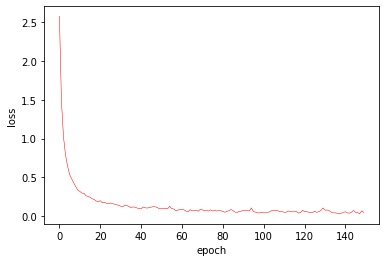

In [15]:
import matplotlib.pyplot as plt


plt.xlabel("epoch")
plt.ylabel("loss")
x = list(range(len(epoch_losses)))
# print(x)
plt.plot(x,epoch_losses,linewidth=0.5,c='red')
plt.show()

In [16]:
apps_dict={}

for i, name in enumerate(apps):
  apps_dict[name] = i

num_label=[]
for app in SAME:
  num_label.append(apps_dict[app])

new_train_g = []
new_train_l = []
for label, graph in zip(test_graph_labels, test_graphs):
  if label in num_label:
    new_train_g.append(graph)
    new_train_l.append(label)

print(len(new_train_g))
print(len(new_train_l))
print(new_train_l[0])

apps_dict_iname = {}
for i, name in enumerate(apps):
  apps_dict_iname[i] = name

x = []
for l in new_train_l:
  x.append(l.item())
print(x)

SAME_dict={}
for i, name in enumerate(SAME):
  SAME_dict[name] = i

print(SAME_dict)

import torch

app_name = []
for l in x:
  app_name.append(apps_dict_iname[l])
print(app_name)

SAME_labels = []
for name in app_name:
  SAME_labels.append(SAME_dict[name])
# set(SAME_labels)
new_test_l = torch.tensor(SAME_labels[:2600])
new_test_g = new_train_g[:2600]


2634
2634
tensor(0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

In [17]:
from dgl.data import DGLDataset
from dgl.data.utils import load_graphs

# g, l = load_graphs('sample/train_graphs.bin')

class Testdataset(DGLDataset):
  _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/qm7b.mat'
  _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

  def __init__(self, raw_dir=None, force_reload=False, verbose=False):
    super().__init__(name='qm7b',
            url=self._url,
            raw_dir=raw_dir,
            force_reload=force_reload,
            verbose=verbose)

  def process(self):
    # 将数据处理为图列表和标签列表
    self.graphs, self.label = new_test_g, new_test_l
    # self.graphs, self.label = train_graphs, train_graph_labels

  def __getitem__(self, idx):
    """ 通过idx获取对应的图和标签

    Parameters
    ----------
    idx : int
        Item index

    Returns
    -------
    (dgl.DGLGraph, Tensor)
    """
    return self.graphs[idx], self.label[idx]

  def __len__(self):
    """数据集中图的数量"""
    return len(self.graphs)
  
  @property
  def num_labels(self):
    return 17

In [18]:
from dgl.dataloading import GraphDataLoader

dataset1 = Testdataset()
dataloader = GraphDataLoader(
  dataset1,
  batch_size=100,
  drop_last=False,
  shuffle=True)
print(dataset[0])

(Graph(num_nodes=3, num_edges=6,
      ndata_schemes={'attr': Scheme(shape=(63,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}), tensor(0))


In [19]:
# Test the model
model.eval()  # eval mode(batch norm uses moving mean/variance 
              #instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for batched_graph, labels in dataloader:
        feats = batched_graph.ndata['attr']
        outputs = model(batched_graph, feats)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test accuracy of the model on the 10000 test batched_graph: {} %'
          .format(100 * correct / total))

Test accuracy of the model on the 10000 test batched_graph: 94.84615384615384 %


In [20]:

from sklearn.metrics import classification_report
# Test the model
model.eval()  # eval mode(batch norm uses moving mean/variance 
              #instead of mini-batch mean/variance)
with torch.no_grad():
  pred = []
  true = []
  for batched_graph, labels in dataloader:
      feats = batched_graph.ndata['attr']
      outputs = model(batched_graph, feats)
      _, predicted = torch.max(outputs.data, 1)
      pred.extend(np.array(predicted))
      true.extend(np.array(labels))
  
print(classification_report(true, pred, target_names=SAME))


                        precision    recall  f1-score   support

                diijam       0.95      0.94      0.95       106
               myradio       0.99      0.96      0.97       120
               spotify       0.95      0.98      0.96       212
            nhaccuatui       0.98      1.00      0.99       300
            soundcloud       0.98      0.99      0.98       203
            sachnoiapp       0.88      0.92      0.90       138
truyenaudiosachnoiviet       0.96      0.92      0.94        59
                voizfm       0.95      0.99      0.97       163
                tunefm       0.78      0.74      0.76        90
               radiofm       0.98      0.98      0.98        94
              nhacvang       0.79      0.70      0.74        87
                wesing       0.99      0.99      0.99       183
                  kaka       0.95      0.91      0.93       177
        podcast_player       0.90      0.85      0.87       121
            starmarker       0.92      